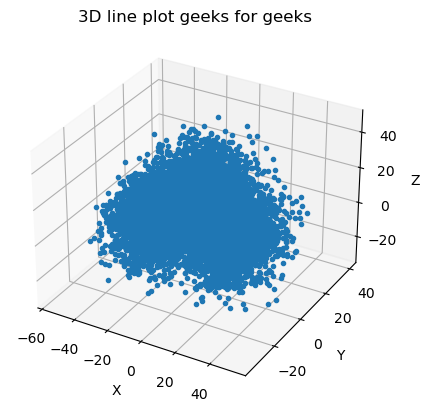

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
markersize = 3
p = np.array([0.3, 0.3, 0.4])
m = np.array([[0, 0, 2],[2, 0, 0],[-2, 0, 0],[-2.5, 0, 0]]) * 10
s = np.array([np.eye(3,3), np.eye(3,3), np.eye(3,3), np.eye(3,3)]) * 100
w = 0.5
x = [0, 0, 0]
y = [0, 0, 0]
sample_size = 10000
labels = np.random.choice(3, sample_size, p=p)
samples = np.zeros((3, sample_size))
for i in range(sample_size):
    if(labels[i] == 2):
        if(np.random.choice(2, 1, p=[w, 1-w])):
            samples[:, i] = np.random.multivariate_normal(m[3], s[3])
        else:
            samples[:, i] = np.random.multivariate_normal(m[2], s[2])
    if(labels[i] == 1):
        samples[:, i] = np.random.multivariate_normal(m[1], s[1])
    if(labels[i] == 0):
        samples[:, i] = np.random.multivariate_normal(m[0], s[0])
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot3D(samples[0], samples[1], samples[2], '.')
ax.set_title('3D line plot geeks for geeks')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

[[2512.  228.  260.]
 [ 226. 2748.   60.]
 [ 163.   28. 3775.]]
0.09650000000000003


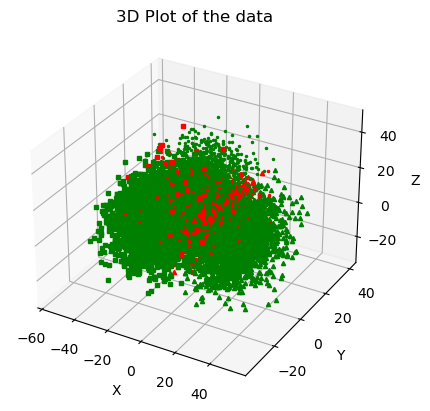

In [62]:
def cal_prob(x, m, s):
    return np.exp(-0.5 * ((x - m).T @ np.linalg.inv(s)) @ (x - m)) / np.sqrt( (2 * np.pi)**(len(x)) * np.linalg.det(s))
def MAP(x):
    prob = np.zeros(3)
    for i in range(3):
        prob[i] = cal_prob(x, m[i], s[i]) * p[i]
    return np.argmax(prob)
result = np.zeros(sample_size)
for i in range(sample_size):
    result[i] = MAP(samples[:, i])
confusion_matrix = np.zeros((3, 3))
for i in range(sample_size):
    confusion_matrix[labels[i], int(result[i])] += 1
print(confusion_matrix)
error_rate = 0
for i in range(3):
    error_rate += confusion_matrix[i, i]
error_rate = 1 - error_rate / sample_size
print(error_rate)
ax = plt.axes(projection ='3d')
for i in range(sample_size):
    if(labels[i] == result[i]):
        if(labels[i] == 0):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'g.', markersize = markersize)
        if(labels[i] == 1):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'g^', markersize = markersize)
        if(labels[i] == 2):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'gs', markersize = markersize)

    else:
        if(labels[i] == 0):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'r.', markersize = markersize)
        if(labels[i] == 1):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'r^', markersize = markersize)
        if(labels[i] == 2):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'rs', markersize = markersize)
ax.set_title('3D Plot of the data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

[[2032.  203.  765.]
 [ 187. 2674.  173.]
 [  32.    7. 3927.]]
0.13670000000000004


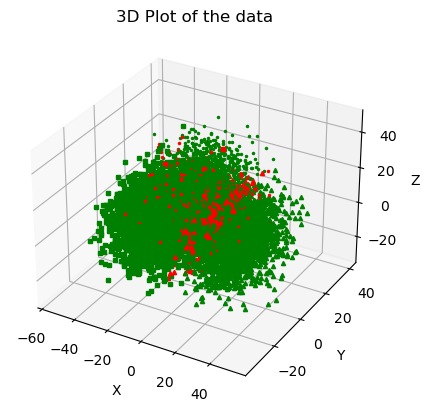

In [63]:
# Empricial risk minimization classifier
loss = np.array([[0, 1, 10], [1, 0, 10], [1, 1, 0]])
def ERM(x):
    risk = np.zeros(3)
    for i in range(3):
        for j in range(3):
            if(j == 0 or j == 1):
                risk[i] += loss[i, j] * cal_prob(x, m[j], s[j]) * p[j]
            if(j == 2):
                risk[i] += loss[i, j] * (w * cal_prob(x, m[j], s[j]) + w * cal_prob(x, m[j+1], s[j+1])) * p[j]
    return np.argmin(risk)
result = np.zeros(sample_size)
for i in range(sample_size):
    result[i] = ERM(samples[:, i])
confusion_matrix = np.zeros((3, 3))
for i in range(sample_size):
    confusion_matrix[labels[i], int(result[i])] += 1
print(confusion_matrix)
# calculate the error rate
error_rate = 0
for i in range(3):
    error_rate += confusion_matrix[i, i]
error_rate = 1 - error_rate / sample_size
print(error_rate)
ax = plt.axes(projection ='3d')
for i in range(sample_size):
    if(labels[i] == result[i]):
        if(labels[i] == 0):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'g.', markersize = markersize)
        if(labels[i] == 1):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'g^', markersize = markersize)
        if(labels[i] == 2):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'gs', markersize = markersize)

    else:
        if(labels[i] == 0):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'r.', markersize = markersize)
        if(labels[i] == 1):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'r^', markersize = markersize)
        if(labels[i] == 2):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'rs', markersize = markersize)
ax.set_title('3D Plot of the data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

[[1.166e+03 1.520e+02 1.682e+03]
 [1.230e+02 2.374e+03 5.370e+02]
 [3.000e+00 3.000e+00 3.960e+03]]
0.25


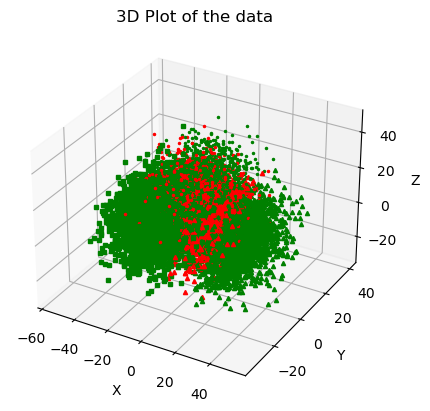

In [64]:
loss = np.array([[0, 1, 100], [1, 0, 100], [1, 1, 0]])
def ERM(x):
    risk = np.zeros(3)
    for i in range(3):
        for j in range(3):
            if(j == 0 or j == 1):
                risk[i] += loss[i, j] * cal_prob(x, m[j], s[j]) * p[j]
            if(j == 2):
                risk[i] += loss[i, j] * (w * cal_prob(x, m[j], s[j]) + w * cal_prob(x, m[j+1], s[j+1])) * p[j]
    return np.argmin(risk)
result = np.zeros(sample_size)
for i in range(sample_size):
    result[i] = ERM(samples[:, i])
confusion_matrix = np.zeros((3, 3))
for i in range(sample_size):
    confusion_matrix[labels[i], int(result[i])] += 1
print(confusion_matrix)
# calculate the error rate
error_rate = 0
for i in range(3):
    error_rate += confusion_matrix[i, i]
error_rate = 1 - error_rate / sample_size
print(error_rate)
ax = plt.axes(projection ='3d')
for i in range(sample_size):
    if(labels[i] == result[i]):
        if(labels[i] == 0):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'g.', markersize = markersize)
        if(labels[i] == 1):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'g^', markersize = markersize)
        if(labels[i] == 2):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'gs', markersize = markersize)

    else:
        if(labels[i] == 0):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'r.', markersize = markersize)
        if(labels[i] == 1):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'r^', markersize = markersize)
        if(labels[i] == 2):
            ax.plot3D(samples[0, i], samples[1, i], samples[2, i], 'rs', markersize = markersize)
ax.set_title('3D Plot of the data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()